In [1]:
# IMPORTING ALL REQ LIBRARIES

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# DATAFRAME USING RAW LINK

df = pd.read_csv('https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


**DATA CLEANING**

In [4]:

# ONLY INT & FLOAT VALUES :

df = df.select_dtypes(include = ['int64' , 'float64'])
df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


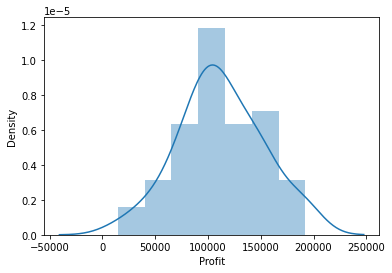

In [5]:
# DATA VISUALISATION WITHOUT MULTI-LINEAR REGRESSION

sns.distplot(df['Profit'])
plt.show()

In [7]:
# SHAPE OF DATAFRAME

df.shape

(50, 4)

In [8]:
# INPUT (without PROFITS)
x = df.iloc[:,0:3].values

# OUTPUT (only PROFITS)
y = df.iloc[:,-1].values

In [9]:
# IMPORTING MODEL (split = 75:25)

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(37, 3)
(13, 3)
(37,)
(13,)


In [11]:
# FITTING THE MODEL

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [12]:
# PREDICTING OUTPUT

y_pred = model.predict(x_test)
y_pred 

array([104858.68792624, 132180.42376363, 133322.11933423,  72113.62933704,
       179083.55561998, 114843.75907009,  65955.16143209,  98683.96747911,
       114456.08522159, 168405.59509517,  96182.70251536,  87655.37645653,
       110908.05435256])

In [13]:
# ACTUAL OUTPUT v/s PREDICTED OUTPUT

df_m = pd.DataFrame({'ACTUAL OUTPUT' : y_test , 'PREDICTED OUTPUT' : y_pred})
df_m

,ACTUAL OUTPUT,PREDICTED OUTPUT
0,103282.38,104858.687926
1,144259.40,132180.423764
2,146121.95,133322.119334
3,77798.83,72113.629337
4,191050.39,179083.555620
5,105008.31,114843.759070
6,81229.06,65955.161432
7,97483.56,98683.967479
8,110352.25,114456.085222
9,166187.94,168405.595095


**DATA VISUALISATION**

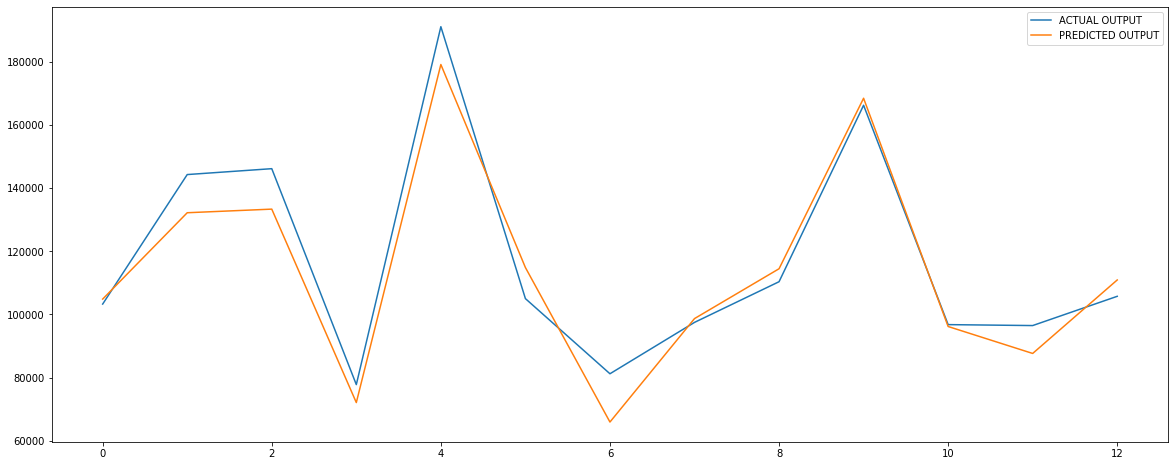

In [14]:
# ACTUAL v/s PREDICTED -> NORMAL PLOT

df_m.plot(figsize=(20,8))
plt.show()

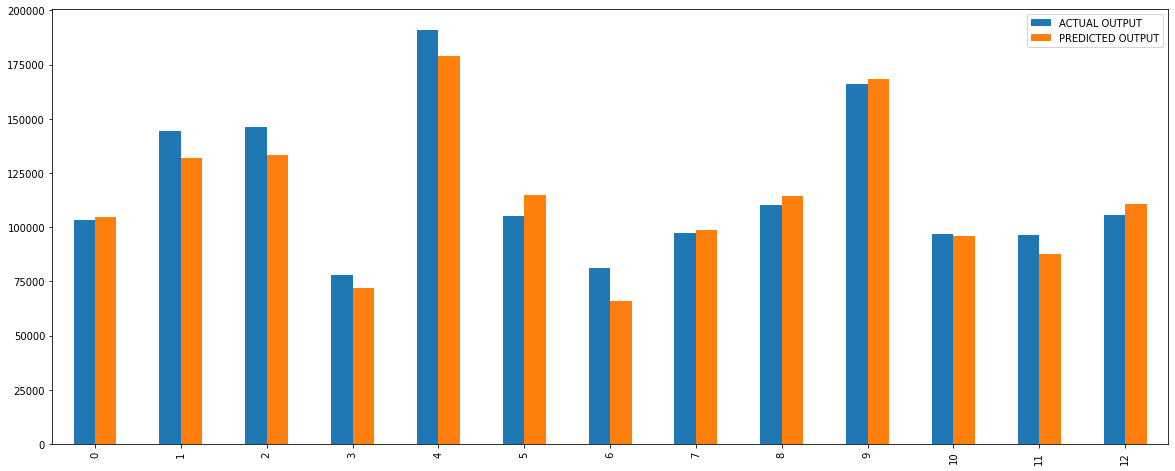

In [15]:
# ACTUAL v/s PREDICTED ->  BAR GRAPH

df_m.plot(figsize=(20,8), kind = 'bar')
plt.show()

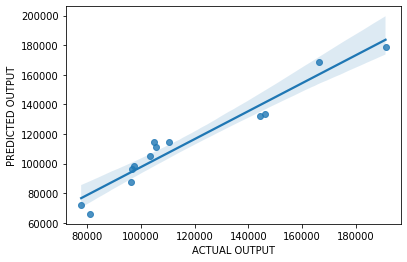

In [23]:
# USING SEABORN
sns.regplot(x = 'ACTUAL OUTPUT' , y = 'PREDICTED OUTPUT' , data = df_m)
plt.show()

In [16]:
# REGRESSION SCORE
from sklearn.metrics import r2_score 
r2_score(y_test,y_pred)

0.9325475204846337

**MODEL PERSISTANCE**

In [17]:
# MODEL PERSISTANCE (creating a file to share and use it elsewhere as a model)
import pickle

In [19]:
# SERIALISATION STEP
pickle.dump(model,open("minor project.pkl","wb")) 

# DESERIALISATION STEP
reload_model = pickle.load(open("minor project.pkl","rb"))

In [20]:
# input = 3 values(i.e., column values) in a row of dataframe.
# It will give the req output wrt of 3 input values


reload_model.predict([[63500 , 156750 , 34560]])

array([98955.46659708])